<h1>Homework 3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 25% (E1)
2. TGGGG: 25% (E2)
3. GGGGG: 50% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [3]:
E1 = 0.25
E2 = 0.25
E3 = 0.5

E3

0.5

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 75% chance of crossing safely,” he reasons, “since only the case 25% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

In [18]:
#Probability of capturing a troll in each case P(Ex|C)
capture_E1 = 0.40
capture_E2 = 0.20
capture_E3 = 0

#Probability of capturing at all P(C)
capture = (capture_E1*E1) + (capture_E2*E2) + (capture_E3*E3)

#Probability of safely crossing GIVEN CAPTURE P(safe|C)
safe_E1 = (capture_E1*E1)/capture
safe_E2 = (capture_E2*E2)/capture
safe_E3 = (capture_E3*E3)/capture

#Probability of safety P(safe)
cross_safely = (capture_E1*safe_E1) + (capture_E2*safe_E2) + (capture_E3*safe_E3)

println("The overall chance of the knight safely crossing is $cross_safely.")

The overall chance of the knight safely crossing is 0.3333333333333333.


P(C) = P(C|E1)*P(E1) + P(C|E2)P(E2) + P(C|E3)P(E3)

P(C) = (0.4*0.25) + (0.2*0.25) + (0*0.5)

P(C) = 0.15

No, I would not agree because in the case of E1, he has a 2/5 probability of capturing a troll. In the case of E2, he has a 1/5 probability of capturing a troll. In the case of E3, he cannot capture a troll at all. This means that the knight's reasoning is flawed.


### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

Probability of safety GIVEN A TROLL WAS CAPTURED

The knight only needs to consider events E1 and E2 since there is no possibility of capturing a troll in E3.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [ ]:
#Probability of THE EVENT GIVEN A TROLL CAPTURED P(safe|E1)
E1_given_capture = (capture_E1*E1)/capture

1.6666666666666665

Probability of the other event given a troll captured: 

In [9]:
#Probability of safety GIVEN A TROLL CAPTURED P(safe|E1)
safety_E2 = (capture_E2*E2)/capture

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [14]:
E3

0.5

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

  Activating project at `c:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks`
    Updating registry at `C:\Users\steal\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Project.toml`
  [f27b6e38] + Polynomials v4.0.17
    Updating `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Manifest.toml`
  [f27b6e38] + Polynomials v4.0.17
Precompiling project...
   2470.3 ms  ✓ Polynomials → PolynomialsChainRulesCoreExt
   3174.5 ms  ✓ Polynomials → PolynomialsFFTWExt
  2 dependencies successfully precompiled in 7 seconds. 454 already precompiled.


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 4x - 2


In [6]:
x = -10:1:10
y_true = x.^2 .+ 4x .- 2

21-element Vector{Int64}:
  58
  43
  30
  19
  10
   3
  -2
  -5
  -6
  -5
   ⋮
  10
  19
  30
  43
  58
  75
  94
 115
 138

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [7]:
using Random, Distributions

noise = rand(Normal(0, 10),length(x))

y_observed = y_true .+ noise

21-element Vector{Float64}:
  69.14343552207866
  31.62266168942999
  27.885120392204843
  37.940986116638314
  24.74336907515184
   6.545932727562842
 -15.444251062082104
 -11.812548550932691
   7.337812525658084
  -2.8846972630686207
   ⋮
  11.306932454870996
  17.28251437358059
  28.372873099384194
  46.26606386411785
  54.399442799829096
  96.68185066450522
  93.21271383879889
 110.7976266942381
 142.2074217404841

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

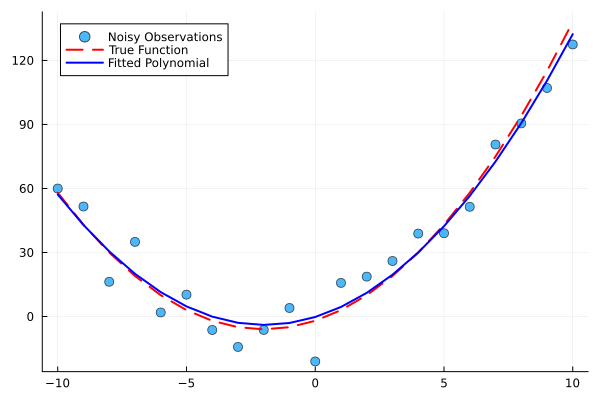

In [33]:
using Random, Distributions, Plots, Polynomials

# Generate x values
x = -10:1:10

# Compute the true values
y_true = x.^2 .+ 4 .* x .- 2

# Generate Gaussian noise with mean 0 and standard deviation 10
noise = rand(Normal(0, 10), length(x))

# Add noise to y_true to obtain y_observed
y_observed = y_true .+ noise

p = Polynomials.fit(x, y_observed, 2)  # Specify the module explicitly

y_fitted = p.(x)

scatter(x, y_observed, label="Noisy Observations", markersize=5, alpha=0.7)
plot!(x, y_true, label="True Function", linewidth=2, linestyle=:dash, color=:red)
plot!(x, y_fitted, label="Fitted Polynomial", linewidth=2, color=:blue)

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 40

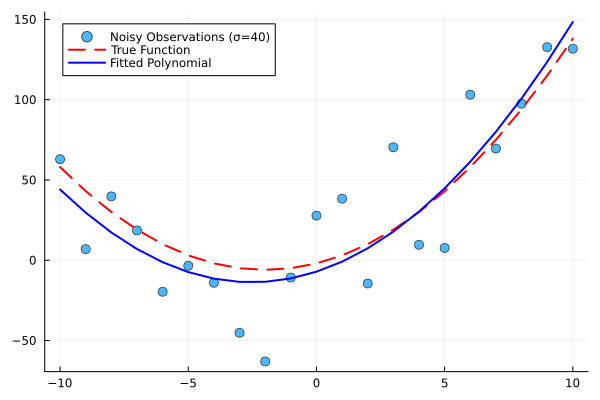

In [37]:
using Random, Distributions, Plots, Polynomials

# Generate x values
x = -10:1:10

# Compute the true values
y_true = x.^2 .+ 4 .* x .- 2

# Generate Gaussian noise with mean 0 and standard deviation 40
noise = rand(Normal(0, 40), length(x))

# Add noise to y_true to obtain y_observed
y_observed = y_true .+ noise

# Generate Gaussian noise with mean 0 and standard deviation 40
noise = rand(Normal(0, 40), length(x))

# Add noise to y_true to obtain y_observed
y_observed = y_true .+ noise

p = Polynomials.fit(x, y_observed, 2)  # Use `Polynomials.fit`

# Generate fitted values
y_fitted = p.(x)

# Plot the results
scatter(x, y_observed, label="Noisy Observations (σ=40)", markersize=5, alpha=0.7)
plot!(x, y_true, label="True Function", linewidth=2, linestyle=:dash, color=:red)
plot!(x, y_fitted, label="Fitted Polynomial", linewidth=2, color=:blue)

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit in 2.3 is closer due to having less noise than this plot.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


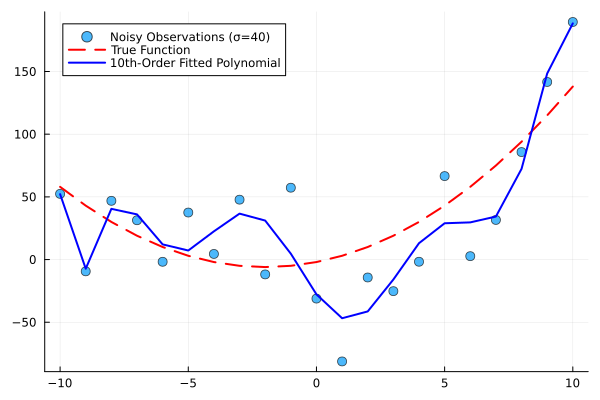

In [38]:
using Random, Distributions, Plots, Polynomials

# Generate x values
x = -10:1:10

# Compute the true values
y_true = x.^2 .+ 4 .* x .- 2

# Generate Gaussian noise with mean 0 and standard deviation 40
noise = rand(Normal(0, 40), length(x))

# Add noise to y_true to obtain y_observed
y_observed = y_true .+ noise

# Fit a 10th-order polynomial to (x, y_observed)
p = Polynomials.fit(x, y_observed, 10)  # Degree 10 polynomial fit

# Generate fitted values
y_fitted = p.(x)

# Plot the results
scatter(x, y_observed, label="Noisy Observations (σ=40)", markersize=5, alpha=0.7)
plot!(x, y_true, label="True Function", linewidth=2, linestyle=:dash, color=:red)
plot!(x, y_fitted, label="10th-Order Fitted Polynomial", linewidth=2, color=:blue)


### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.2
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


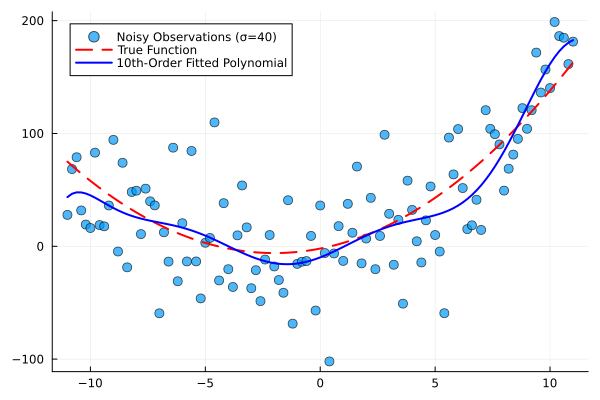

In [39]:
using Random, Distributions, Plots, Polynomials

# Generate new x_fit values ranging from -11 to 11 with increment of 0.2
x_fit = -11:0.2:11

# Compute the true values using x_fit
y_true = x_fit.^2 .+ 4 .* x_fit .- 2

# Generate Gaussian noise with mean 0 and standard deviation 40
noise = rand(Normal(0, 40), length(x_fit))

# Add noise to y_true to obtain y_observed
y_observed = y_true .+ noise

# Fit a 10th-order polynomial to (x_fit, y_observed)
p = Polynomials.fit(x_fit, y_observed, 10)  # Fit a 10th-order polynomial

# Generate fitted values for the polynomial using x_fit
y_fitted = p.(x_fit)

# Plot the results
scatter(x_fit, y_observed, label="Noisy Observations (σ=40)", markersize=5, alpha=0.7)
plot!(x_fit, y_true, label="True Function", linewidth=2, linestyle=:dash, color=:red)
plot!(x_fit, y_fitted, label="10th-Order Fitted Polynomial", linewidth=2, color=:blue)


3. What do you observe in the plot? What is this phenomenon called?

The plot is experiencing overfitting due to the model fitting the noise instead of the underlying true data.